In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

csv_files = [
    "results/openml_969.csv",
    "results/openml_974.csv",
    "results/openml_1462.csv",
    "results/openml_849.csv",
    "results/openml_1510.csv",
    "results/openml_1547.csv",
    "results/ucl_151.csv",
    "results/openml_833.csv",
    "results/openml_879.csv",
]

dfs = {}

for file in csv_files:
    df_name = file.split("/")[-1].split(".")[0]
    dfs[df_name] = pd.read_csv(file)

In [8]:
mapping = {
    "Logistic Regression (SGD)": "LR (SGD)",
    "Logistic Regression (Adam)": "LR (Adam)",
    "Random Forest": "RF",
    "Decision Tree": "Decision Tree",
    "Linear Discriminant Analysis": "LDA",
    "Quadratic Discriminant Analysis": "QDA",
    "Logistic Regression (IRLS)": "LR (IRLS)",
    "Logistic Regression (SGD) with interactions": "LR (SGD) with interactions",
    "Logistic Regression (Adam) with interactions": "LR (Adam) with interactions",
    "Logistic Regression (IRLS) with interactions": "LR (IRLS) with interactions",
}

model_order = [
    "LR (SGD)",
    "LR (SGD) with interactions",
    "LR (Adam)",
    "LR (Adam) with interactions",
    "LR (IRLS)",
    "LR (IRLS) with interactions",
]

custom_colors = [
    "#7eb0d5",
    "#b2e061",
    "#b2e061", # its for tmp1
    "#bd7ebe",
    "#ffb55a",
    "#b2e061", # its for tmp2
    "#ffee65",
    "#fdcce5",
    "#8bd3c7",
]

In [3]:
dfs = [pd.read_csv(file) for file in csv_files]

df = pd.concat(dfs, ignore_index=True)
df["Classifier"] = df["Classifier"].map(mapping)
df = df[df["Classifier"].str.contains("LR")]

df["Dataset"] = df["Dataset"].apply(lambda x: x.split("_")[1])

grouped = (
    df.groupby(["Dataset", "Classifier"])["Balanced_Accuracy"].mean().reset_index()
)

In [4]:
pivot_df = grouped.pivot(
    index="Dataset", columns="Classifier", values="Balanced_Accuracy"
)
pivot_df = pivot_df[model_order]

In [5]:
pivot_df['_tmp1'] = 0
pivot_df['_tmp2'] = 0
pivot_df = pivot_df[['LR (SGD)', 'LR (SGD) with interactions', '_tmp1', 
                     'LR (Adam)', 'LR (Adam) with interactions', '_tmp2', 
                     'LR (IRLS)', 'LR (IRLS) with interactions']]

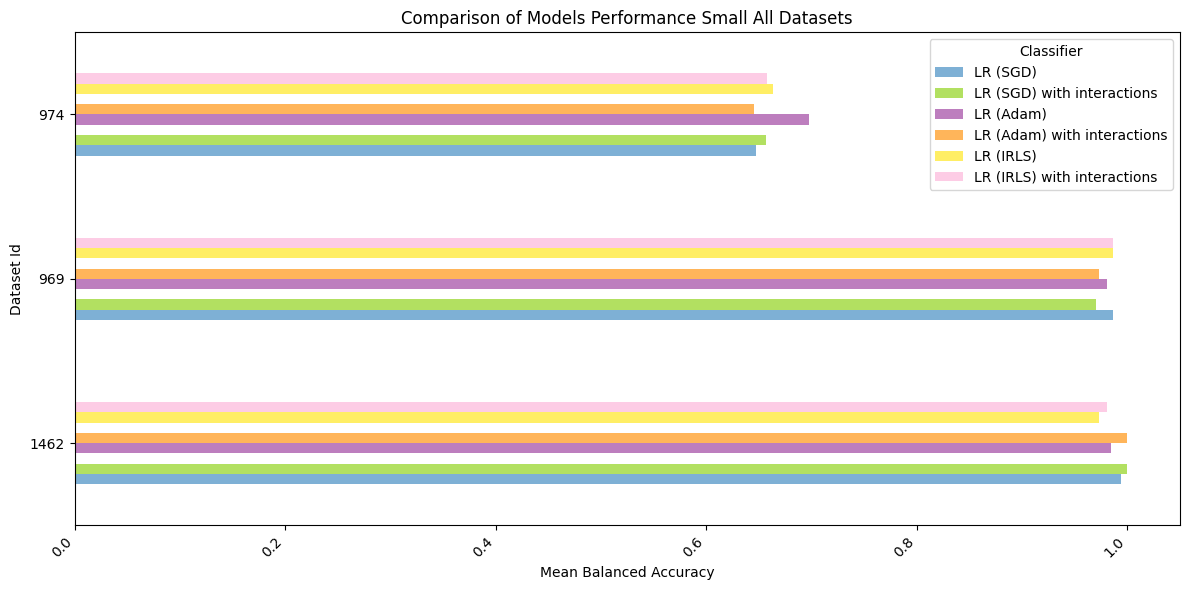

In [6]:
pivot_df.plot(kind="barh", figsize=(12, 6), color=custom_colors, width=0.5)
plt.xlabel("Mean Balanced Accuracy")
plt.ylabel("Dataset Id")
plt.title("Comparison of Models Performance Small All Datasets")
plt.legend(title="Classifier")#, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('comparison_interactions_small_datasets.png')
plt.show()

In [9]:
csv_files = [
    "results/openml_969.csv",
    "results/openml_974.csv",
    "results/openml_1462.csv",
    "results/openml_849.csv",
    "results/openml_1510.csv",
    "results/openml_1547.csv",
    "results/ucl_151.csv",
    "results/openml_833.csv",
    "results/openml_879.csv",
]

model_order = [
    "LR (SGD)",
    "LR (Adam)",
    "LR (IRLS)",
    "LDA",
    "QDA",
    "Decision Tree",
    "RF",
]

dfs = {}
for file in csv_files:
    df_name = file.split("/")[-1].split(".")[0]
    dfs[df_name] = pd.read_csv(file)
    
custom_colors = [
    "#7eb0d5",
    "#b2e061",
    "#bd7ebe",
    "#ffb55a",
    "#ffee65",
    "#fdcce5",
    "#8bd3c7",
]

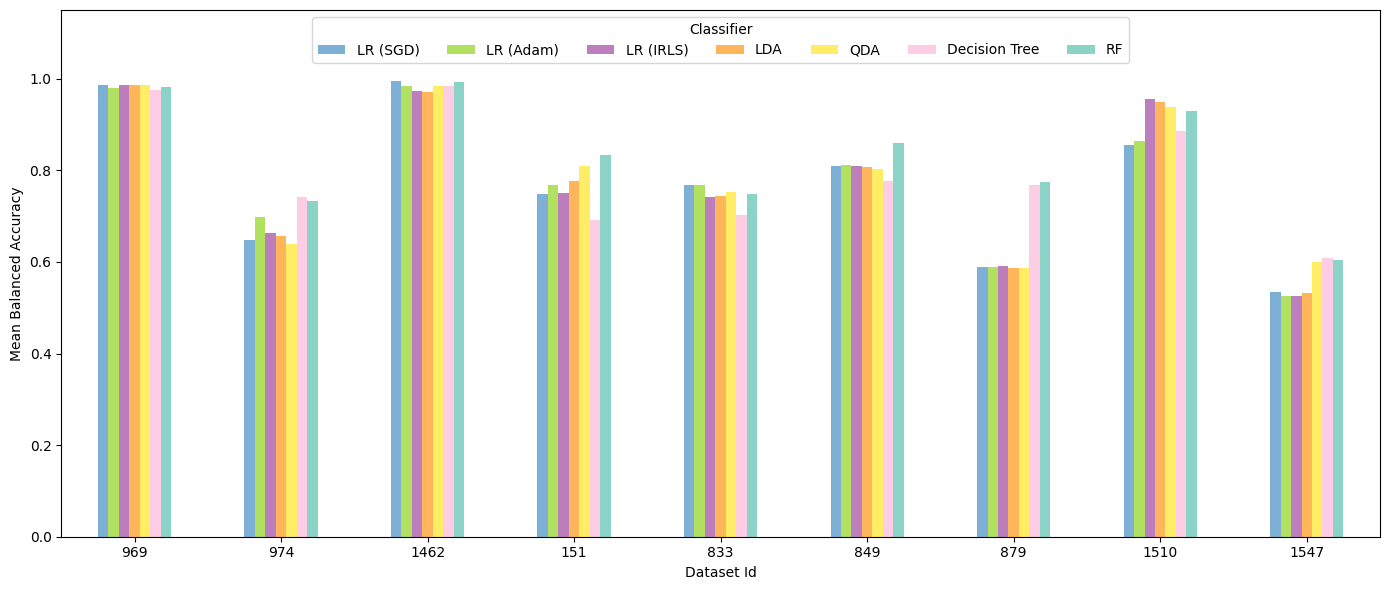

In [10]:
dfs = [pd.read_csv(file) for file in csv_files]

df = pd.concat(dfs, ignore_index=True)
df["Classifier"] = df["Classifier"].map(mapping)
df = df[~df["Classifier"].str.contains("with")]

df["Dataset"] = df["Dataset"].apply(lambda x: x.split("_")[1])

grouped = (
    df.groupby(["Dataset", "Classifier"])["Balanced_Accuracy"].mean().reset_index()
)

pivot_df = grouped.pivot(
    index="Dataset", columns="Classifier", values="Balanced_Accuracy"
)
pivot_df = pivot_df[model_order]
desired_order = ["969", "974", "1462", "151", "833", "849", "879", "1510", "1547"]

pivot_df = pivot_df.reindex(desired_order)

pivot_df.plot(kind="bar", figsize=(14, 6), color=custom_colors)
plt.xlabel("Dataset Id")
plt.ylabel("Mean Balanced Accuracy")
# plt.title("Comparison of Models Performance All Datasets")
plt.ylim(0, 1.15)
plt.legend(title="Classifier", loc="upper center", bbox_to_anchor=(0.5, 1.0), ncol=8)
plt.xticks(rotation=0)
plt.yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.tight_layout()
plt.show()


In [7]:
csv_files = [
    "results/openml_969.csv",
    "results/openml_974.csv",
    "results/openml_1462.csv",
    "results/openml_849.csv",
    "results/openml_1510.csv",
    "results/openml_1547.csv",
    "results/ucl_151.csv",
    "results/openml_833.csv",
    "results/openml_879.csv",
]

for path in csv_files:
    df = pd.read_csv(path)
    df = df[df["Classifier"].str.contains("with")]
    mean_std_df = (
        df.groupby("Classifier")["Balanced_Accuracy"].agg(["mean", "std"]).round(3)
    )
    print(f'Dataset: {path.split("/")[1].split(".")[0]}\n', mean_std_df, '\n\n')

Dataset: openml_969
                                                mean    std
Classifier                                                
Logistic Regression (Adam) with interactions  0.973  0.037
Logistic Regression (IRLS) with interactions  0.987  0.018
Logistic Regression (SGD) with interactions   0.970  0.029 


Dataset: openml_974
                                                mean    std
Classifier                                                
Logistic Regression (Adam) with interactions  0.646  0.072
Logistic Regression (IRLS) with interactions  0.658  0.071
Logistic Regression (SGD) with interactions   0.657  0.069 


Dataset: openml_1462
                                                mean    std
Classifier                                                
Logistic Regression (Adam) with interactions  0.999  0.001
Logistic Regression (IRLS) with interactions  0.981  0.006
Logistic Regression (SGD) with interactions   1.000  0.000 


Dataset: openml_849
                      